# PCA MODEL

In [1]:
#####Links Used:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
#https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
#https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

##WHEN WE START TRAIN/TEST SPLIT REF.: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

# LOADING DATA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
initData = pd.read_csv("publisher_analysis_data.csv")
initData['year'] = initData['year'].apply(lambda x: int(x.split('-')[0]))
initData['half']=initData['year']//50*50
year_series=initData['year']
initData = initData.drop(columns = ['youngsMod','Unnamed: 0', 'sec_calcMass', 'sec_massRec', 'publisher','half', 'year', 'ph'])
initData = initData.dropna()
print(initData.shape)
initData.head()

(957, 7)


,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,sec_Mn,sec_Mw,sec_polyDisp
0,34.670,28.7790,0.051118,0.072340,44.1,127.6,2.890
1,12.710,9.7289,0.030050,0.023396,35.9,85.4,2.377
2,17.301,13.5850,0.034793,0.034683,20.1,93.4,4.653
3,25.879,21.3200,0.044734,0.057662,29.5,91.2,3.094
4,14.901,16.1320,0.047622,0.036076,76.8,161.6,2.105


# BUILDING PCA MODEL

In [4]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=3)
pipeline = Pipeline([
    ('scaling', StandardScaler()), ('normalize', Normalizer())  
])

In [5]:
initData_columnNames= initData.columns
initData_columnNames

Index(['maxLoad', 'stressMaxLoad', 'strainMaxLoad', 'energyAbsorp', 'sec_Mn',
       'sec_Mw', 'sec_polyDisp'],
      dtype='object')

In [6]:
scaleNormPipe = pipeline.fit_transform(initData)
pca_df = pd.DataFrame(data = scaleNormPipe, columns = initData_columnNames)
pca_df.head()

,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,sec_Mn,sec_Mw,sec_polyDisp
0,0.345273,0.310879,0.494949,0.249275,0.601392,0.331088,-0.075740
1,-0.587870,-0.596252,-0.295616,-0.399053,0.129902,-0.038271,-0.184177
2,-0.489325,-0.507682,-0.190872,-0.316612,-0.327467,0.005698,0.508801
3,-0.563277,-0.603694,0.521124,-0.095129,-0.181184,-0.033523,0.060836
4,-0.349843,-0.230712,0.128673,-0.177625,0.824014,0.256298,-0.177727


## PCA

In [7]:
from sklearn.model_selection import train_test_split
# "target" contains the column name of the classification labels
target = "sec_Mw"

X = pca_df.drop(target, 1)
y = pca_df[target]

# seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [8]:
##Transforming Data to Standard Scaler
pca_train = pipeline.fit_transform(X)
# pca_test = pipeline.transform(X_test)

##Taking Scaled Data and Applying PCA
pca_train = pca.fit_transform(pca_train)
# pca_test = pca.transform(pca_test)

##Putting Principal Component Data into Train & Test Dataframes
pca_train_df = pd.DataFrame(data = pca_train, columns = ['PC1', 'PC2', 'PC3'])
# pca_test_df = pd.DataFrame(data = pca_test, columns = ['PC1', 'PC2','PC3'])

In [9]:
##Explained Variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.46102676, 0.23285682, 0.11613861])

In [10]:
PCAs_Mw = pd.concat([pca_train_df,y], axis = 1)
PCAs_Mw

,PC1,PC2,PC3,sec_Mw
0,0.960018,-0.365516,0.247589,0.331088
1,-0.820117,-0.368271,0.305774,-0.038271
2,-0.623188,0.459853,0.533461,0.005698
3,-0.136635,-0.115172,0.427358,-0.033523
4,0.033108,-0.793249,0.591338,0.256298
...,...,...,...,...
952,-0.427884,0.733138,0.422305,-0.080654
953,0.924441,0.408897,0.200713,0.169075
954,0.564732,0.364651,-0.211087,-0.373844
955,1.009902,0.117735,-0.082866,-0.033851


In [11]:
y_pca=pd.concat([PCAs_Mw,year_series], axis = 1)

In [12]:
# ##Appending Our Target Parameter, sec_Mw Onto the Training Principal Component Dataframe
# target = pd.Series(y_train, name='sec_Mw')
# result_df_train = pd.concat([pca_train_df, target], axis=1)
# result_df_train.head()
# result_df_test = pd.concat([pca_test_df, y_test], axis=1)
# result_df_test

## SCATTER PLOT

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

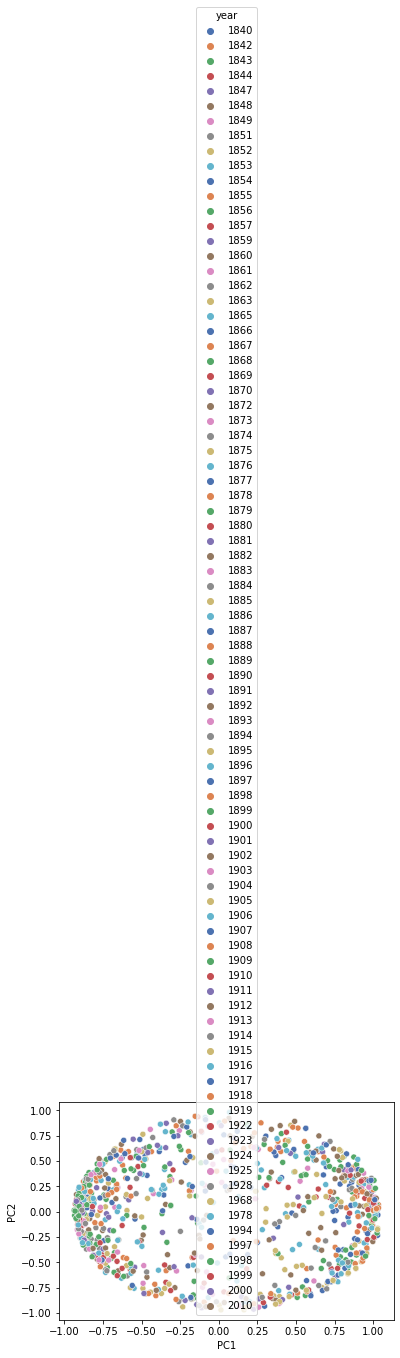

In [25]:
# sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC2', hue=year_series, palette='deep')
sns.scatterplot(data=y_pca, x='PC1', y='PC2', hue=year_series, palette='deep')

#year_series

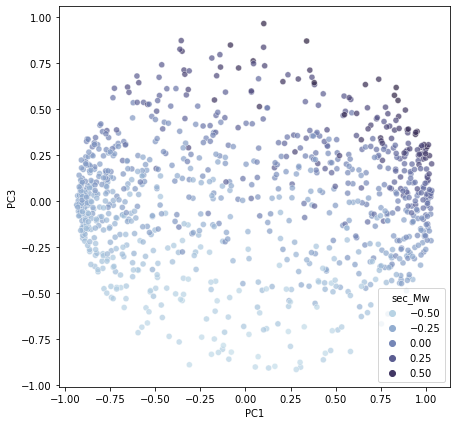

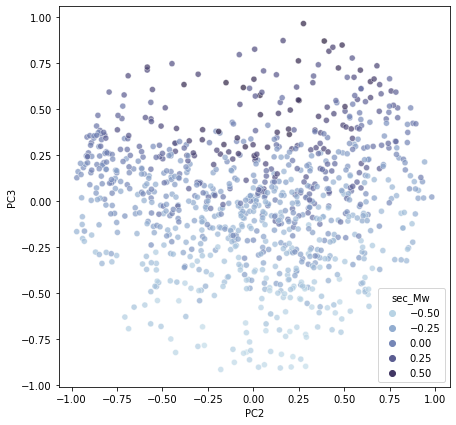

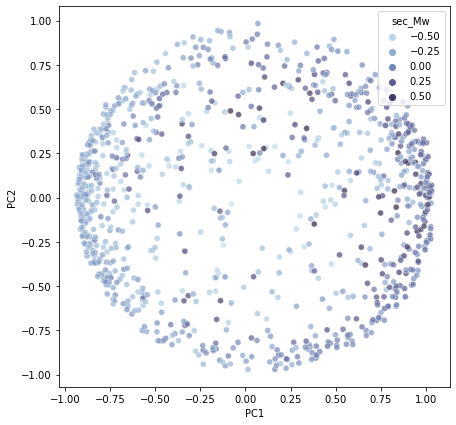

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC3', hue='sec_Mw', palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC2', y='PC3', hue='sec_Mw', palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC2', hue='sec_Mw', palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.show()

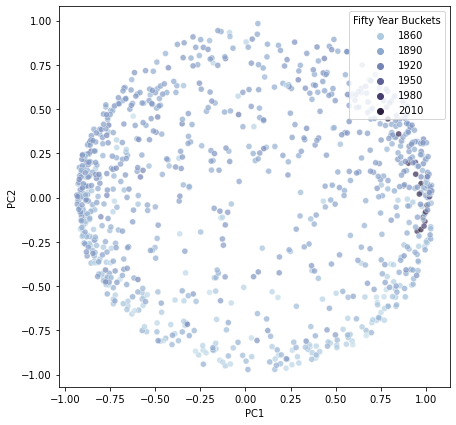

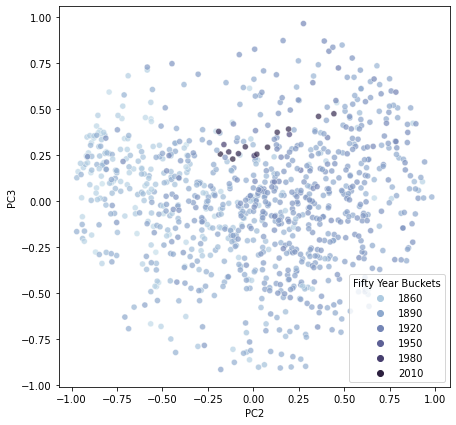

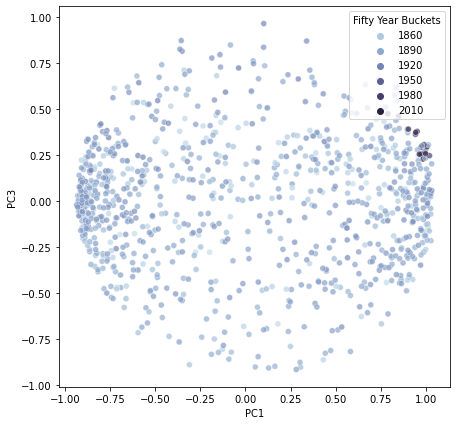

In [16]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC2', hue=year_series, palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.legend(title="Fifty Year Buckets")
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC2', y='PC3', hue=year_series, palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.legend(title="Fifty Year Buckets")
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC3', hue=year_series, palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.legend(title="Fifty Year Buckets")
plt.show()

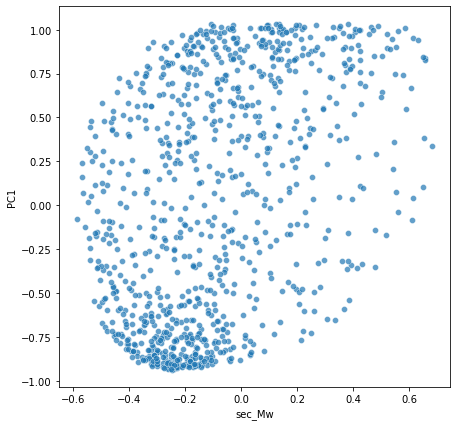

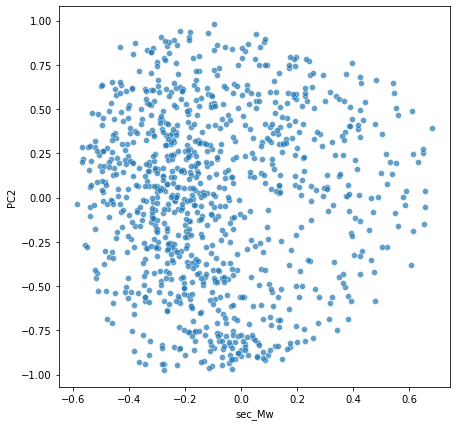

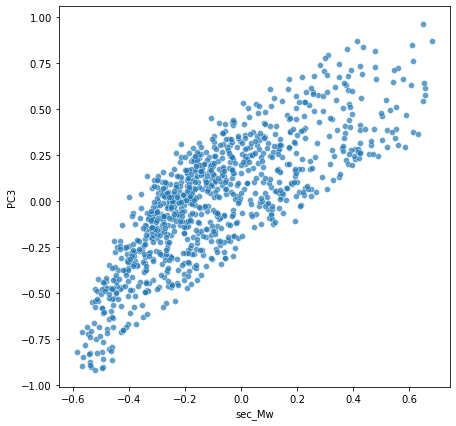

In [17]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, y='PC1', x='sec_Mw', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, y='PC2', x='sec_Mw', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, y='PC3', x='sec_Mw', alpha=0.7)
plt.show()

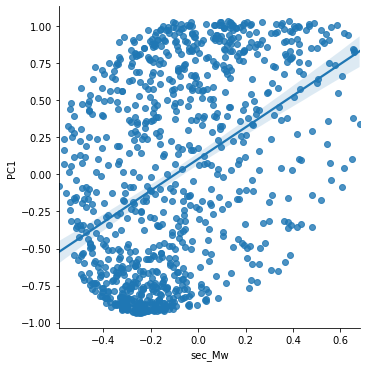

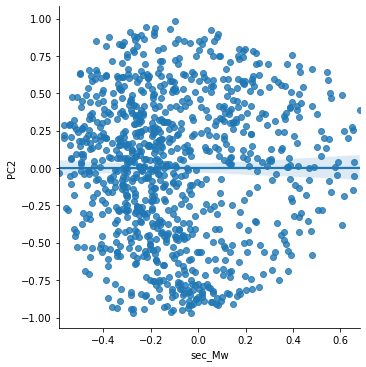

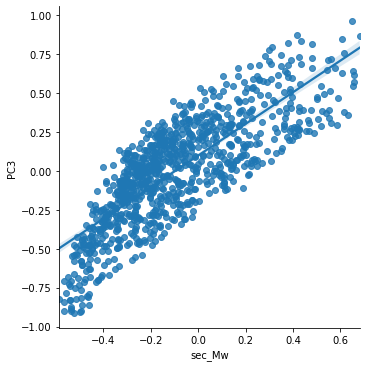

In [18]:
#fig, ax = plt.subplots(figsize=(7,7))
sns.lmplot(data=PCAs_Mw, y='PC1', x='sec_Mw')
#plt.show()

#fig, ax = plt.subplots(figsize=(7,7))
sns.lmplot(data=PCAs_Mw, y='PC2', x='sec_Mw')
#plt.show()

#fig, ax = plt.subplots(figsize=(7,7))
sns.lmplot(data=PCAs_Mw, y='PC3', x='sec_Mw')
#plt.show()

# Scree code

In [19]:
screePipe = pipeline.fit_transform(initData)
scree_pca = PCA(n_components=5)

In [20]:
screeFitTransf=scree_pca.fit_transform(screePipe)

In [21]:
screeFitTransf

array([[ 1.01788883,  0.45718743,  0.27998059, -0.03929457, -0.05592427],
       [-0.74169238,  0.38964845,  0.33492189, -0.06765115, -0.02274709],
       [-0.59987264, -0.38963592,  0.5604911 , -0.1615814 , -0.20356858],
       ...,
       [ 0.31053668, -0.45871884, -0.43740403, -0.10137435, -0.68055855],
       [ 1.02649753, -0.18469515, -0.24205827, -0.23997932,  0.04832436],
       [ 0.64895149, -0.74725262,  0.28912283, -0.33807589, -0.18508929]])

In [22]:
scree_df = pd.DataFrame(data = screeFitTransf, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [23]:
scree_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5
0,1.017889,0.457187,0.279981,-0.039295,-0.055924
1,-0.741692,0.389648,0.334922,-0.067651,-0.022747
2,-0.599873,-0.389636,0.560491,-0.161581,-0.203569
3,-0.317774,0.112700,0.283396,-0.539800,-0.681113
4,0.080320,0.858930,0.600680,0.020011,-0.086071


## SCREE PLOT

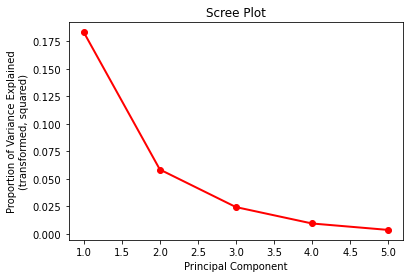

In [24]:
import matplotlib.pyplot as plt

scree_PC_Values = np.arange(scree_pca.n_components_) + 1
plt.plot(scree_PC_Values, np.square(scree_pca.explained_variance_ratio_), 'ro-', linewidth=2)
###We transformed the scree plot by squaring the variance explained to make the "ideal" PC more apparent
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained\n(transformed, squared)')
plt.show()